<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/BREAST_CANCER_USING_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

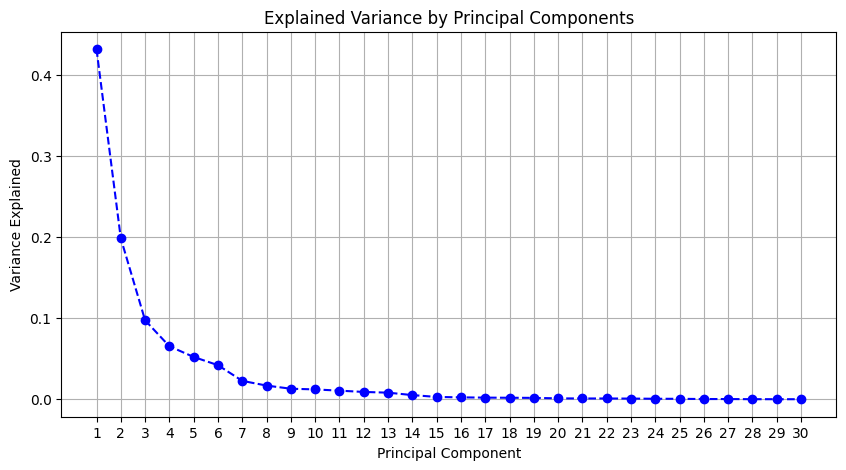

Accuracy of the model with PCA: 0.9766081871345029


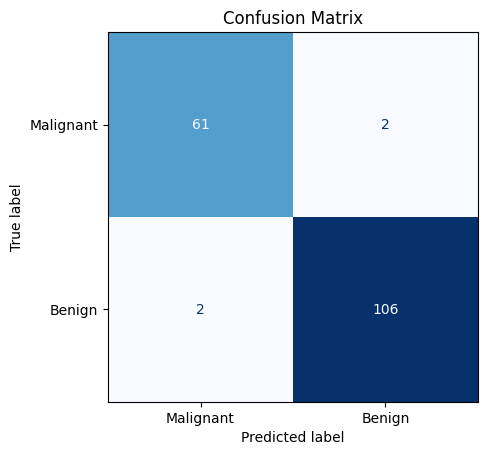

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



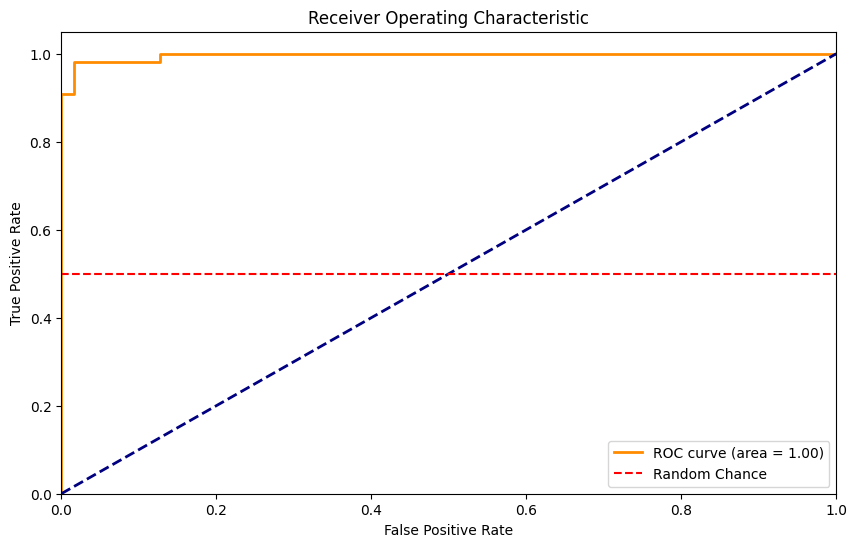

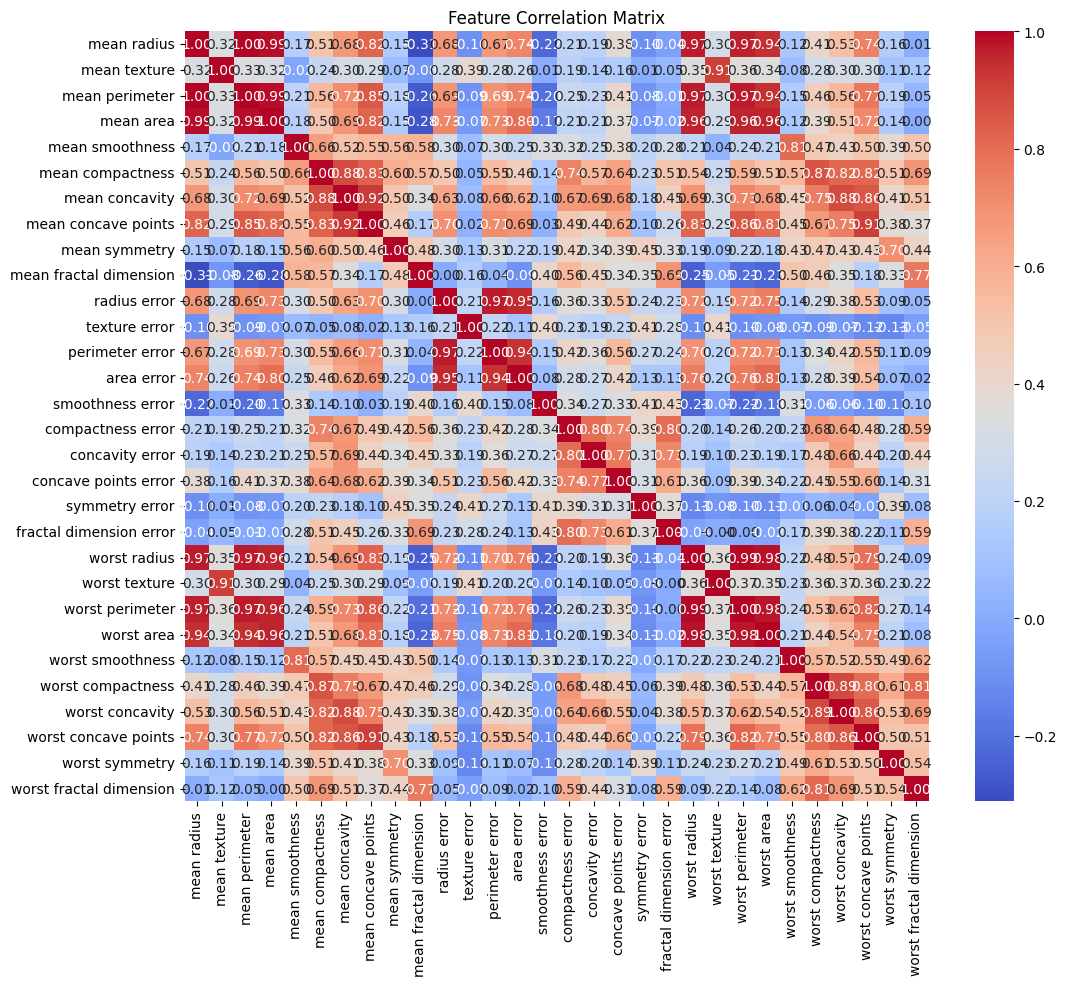

<ipython-input-14-550aaf69e6cb>:117: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




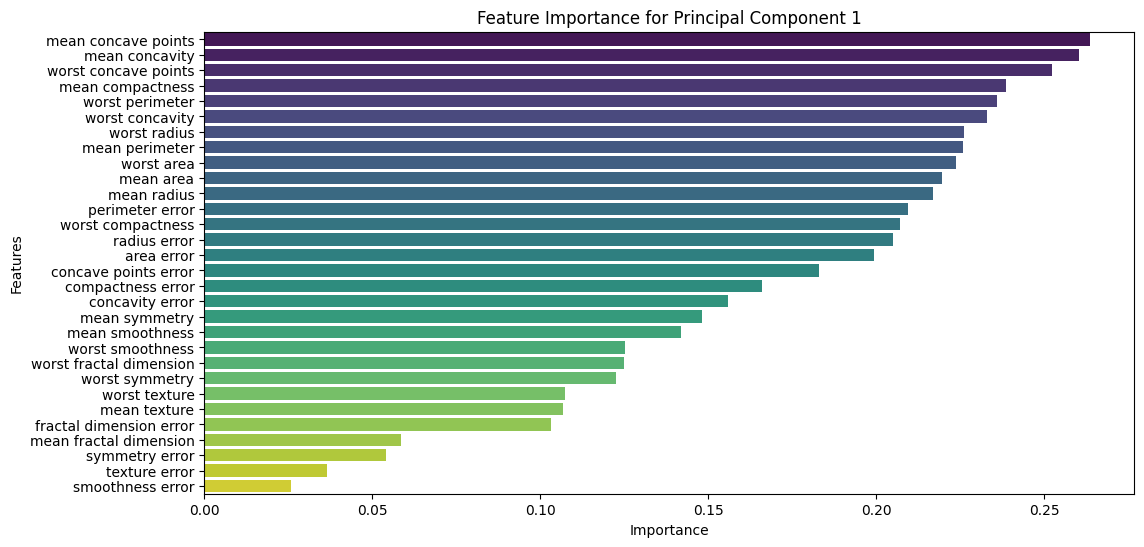

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc
)

# Load the breast cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Target variable
y = cancer['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', linestyle='--', color='blue')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

# Reduce to 3 principal components for 3D visualization
pca = PCA(n_components=3)
X_train_pca_3d = pca.fit_transform(X_train)
X_test_pca_3d = pca.transform(X_test)

# Interactive 3D PCA Scatter Plot using Plotly
fig = px.scatter_3d(
    x=X_test_pca_3d[:, 0],
    y=X_test_pca_3d[:, 1],
    z=X_test_pca_3d[:, 2],
    color=y_test,
    labels={'color': 'Target'},
    title='3D PCA of Breast Cancer Dataset',
    color_continuous_scale='Viridis'
)
fig.show()

# Build and train the logistic regression model with GridSearchCV for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca[:, :2], y_train)

# Predict and evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca[:, :2])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with PCA:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Malignant', 'Benign'])
cm_display.plot(cmap='Blues', colorbar=False)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ROC Curve
y_prob = best_model.predict_proba(X_test_pca[:, :2])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.axhline(y=0.5, color='r', linestyle='--', label='Random Chance')
plt.legend(loc='lower right')
plt.show()

# Feature Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Feature Importance Visualization for the first component
features = np.array(cancer.feature_names)
importance = np.abs(pca.components_[0])
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance for Principal Component 1')
sns.barplot(x=importance[indices], y=features[indices], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
